In [2]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from matplotlib import pyplot

In [3]:
# generate 2 class dataset. It is noisy dataset.
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state= 42)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state= 42)

In [4]:
print(X.shape)
print(type(X))

(1000, 20)
<class 'numpy.ndarray'>


In [5]:
print(y.shape)
print(type(y))

(1000,)
<class 'numpy.ndarray'>


In [6]:
# fit a model
model = SVC(random_state= 42)
model.fit(trainX, trainy)
probs = model.decision_function(testX)

## Reliability Diagram

In [7]:
# fop = The proportion of samples whose class is the positive class, in each bin (fraction of positives).
# mpv = The mean predicted probability in each bin.

In [8]:
fop, mpv = calibration_curve(testy, probs, n_bins = 10, normalize= True)

In [9]:
len(fop)

10

In [10]:
len(mpv)

10

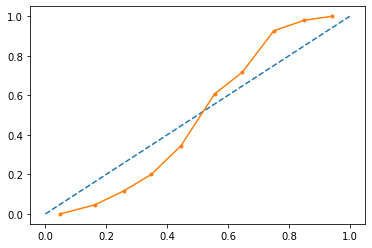

In [11]:
pyplot.plot([0,1], [0, 1], linestyle= '--')
pyplot.plot(mpv, fop, marker = '.')
pyplot.show()

## Calibration

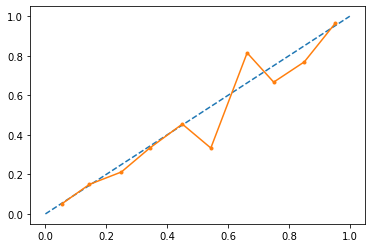

In [12]:
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
model = SVC(random_state= 42)
calibrated = CalibratedClassifierCV(model, method= 'sigmoid', cv = 5)
calibrated.fit(trainX, trainy)
probs = calibrated.predict_proba(testX)[:, 1]
fop, mpv = calibration_curve(testy, probs, n_bins = 10, normalize = True)
pyplot.plot([0,1], [0, 1], linestyle= '--')
pyplot.plot(mpv, fop, marker = '.')
pyplot.show()